In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ann_project
#ann1
import os
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [ ]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/data_set/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/data_set/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)
result.shape

(139, 2)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
#initialising the model
#defining sequential i.e sequense of layers
model = Sequential()

#.add method to add layers into the model

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))



model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       2

In [ ]:
y_train.shape

(111, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/50
3/3 [==============================] - 5s 1s/step - loss: 61.1134 - accuracy: 0.5225 - val_loss: 56.8010 - val_accuracy: 0.6786
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 23.5360 - accuracy: 0.6937 - val_loss: 111.6711 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 23.7647 - accuracy: 0.6757 - val_loss: 85.2782 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 3s 1s/step - loss: 12.9292 - accuracy: 0.7477 - val_loss: 17.2849 - val_accuracy: 0.6786
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 14.2825 - accuracy: 0.7297 - val_loss: 12.0447 - val_accuracy: 0.6786
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 5.5470 - accuracy: 0.8108 - val_loss: 16.9830 - val_accuracy: 0.6429
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 5.5703 - accuracy: 0.8559 - val_loss: 12.1199 - val_accuracy: 0.6786
Epoch 8/50
3/3 [============

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')

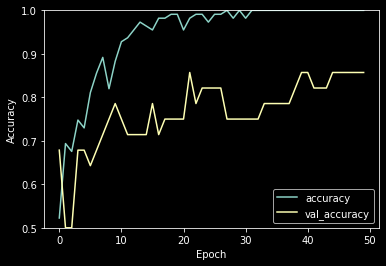

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

1/1 - 0s - loss: 1.8765 - accuracy: 0.8571 - 196ms/epoch - 196ms/step


In [ ]:
print(f"{(test_acc)*100}%    {test_loss}")

85.71428656578064%    1.8764649629592896


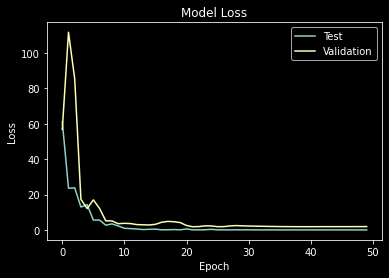

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [ ]:
!pip install streamlit

  Using cached streamlit-1.2.0-py2.py3-none-any.whl (9.1 MB)
     |████████████████████████████████| 111 kB 5.2 MB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
  Using cached base58-2.1.1-py3-none-any.whl (5.6 kB)
     |████████████████████████████████| 178 kB 48.7 MB/s 
     |████████████████████████████████| 4.3 MB 27.7 MB/s 
     |████████████████████████████████| 180 kB 47.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 125 kB 56.3 MB/s 
     |████████████████████████████████| 790 kB 66.0 MB/s 
     |████████████████████████████████| 374 kB 73.4 MB/s 
  Created wheel for pympler: filename=Pympler-0.9-py3-none-any.whl size=164824 sha256=8b73da46bc86acffe8cd6e149d89d652c78a4141494ef15a846ae6a713ef5896
  Stored in directory: /root/.cache/pip/wheels/1a/f3/d8/35d5614ea4ddd295ffb9372a5f2f9570d9593d1ea4be33ec6d
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=11f89434789ec344780374a34

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Flower Classification
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
        size = (128,128)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction


Writing app.py


In [ ]:
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(r"/content/drive/MyDrive/data_set/brain_tumor_dataset/yes/Y153.jpg")
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

NameError: ignored

100.0% Confidence This Is Its a Tumor
[[1. 0.]]


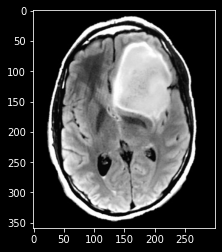

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/data_set/brain_tumor_dataset/yes/Y153.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))
print(res)

# Modules


### Importing Important Modules

In [ ]:
#importing all the required modules/library
import os
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### Data Preprocessing 


In [ ]:
#setting encoder  
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

#pocessing data containing tumour
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/data_set/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

#processing data containing no tumour
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/data_set/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

#storing processed data for future use.
data = np.array(data)

result = np.array(result)
result = result.reshape(139,2)


### Data Splitting

In [ ]:
#Splitting data and results(labels) for training and testing
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

### Creating Model Architecture

In [ ]:
#creating a model with sequential architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 batch_normalization_11 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        8256      
                                                                 
 batch_normalization_12 (Bat  (None, 64, 64, 64)      

### Training ( Fitting Model to Testing Data )

In [ ]:
# Training / fitting model into testing data
history = model.fit(x_train, y_train, epochs = 80, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/80
3/3 [==============================] - 5s 1s/step - loss: 54.8476 - accuracy: 0.5315 - val_loss: 328.9522 - val_accuracy: 0.5000
Epoch 2/80
3/3 [==============================] - 4s 1s/step - loss: 41.5485 - accuracy: 0.6306 - val_loss: 75.7798 - val_accuracy: 0.5714
Epoch 3/80
3/3 [==============================] - 4s 1s/step - loss: 15.6220 - accuracy: 0.7387 - val_loss: 18.1125 - val_accuracy: 0.6786
Epoch 4/80
3/3 [==============================] - 4s 1s/step - loss: 12.3195 - accuracy: 0.7027 - val_loss: 24.6380 - val_accuracy: 0.6071
Epoch 5/80
3/3 [==============================] - 4s 1s/step - loss: 13.8148 - accuracy: 0.6847 - val_loss: 19.4713 - val_accuracy: 0.6071
Epoch 6/80
3/3 [==============================] - 4s 1s/step - loss: 7.9430 - accuracy: 0.7658 - val_loss: 12.3863 - val_accuracy: 0.6071
Epoch 7/80
3/3 [==============================] - 4s 1s/step - loss: 4.2763 - accuracy: 0.7748 - val_loss: 11.7490 - val_accuracy: 0.6786
Epoch 8/80
3/3 [============

Accuracy Graph

In [ ]:
#Saving Trained model
tf.keras.models.save_model(model,'my_model.hdf5')

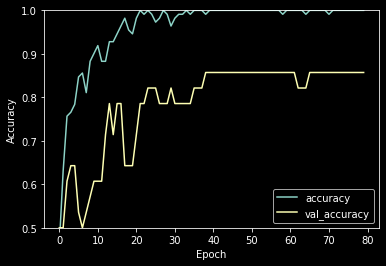

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

1/1 - 0s - loss: 2.3218 - accuracy: 0.8571 - 208ms/epoch - 208ms/step


In [ ]:
print(f"{(test_acc)*100}%    {test_loss}")

85.71428656578064%    2.3218486309051514


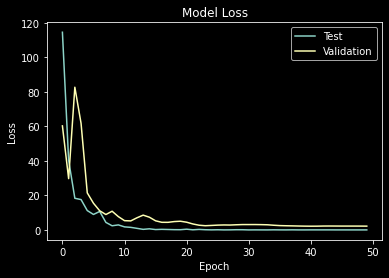

In [ ]:
# visualizing losses of model wrt epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

### Saving Trained model

### Using Model for prediction / Inference 

In [ ]:
#decoding output
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor
[[2.170596e-22 1.000000e+00]]


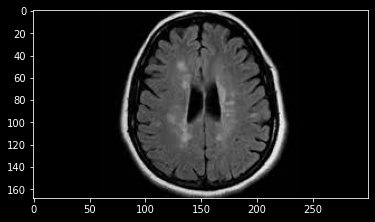

In [ ]:
#using model for prediction
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/data_set/brain_tumor_dataset/no/13 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))
print(res)

# For GUI

In [ ]:
#decoding output
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its NOT a tumor'

100.0% Confident that Its NOT a tumor
[[7.45062e-22 1.00000e+00]]


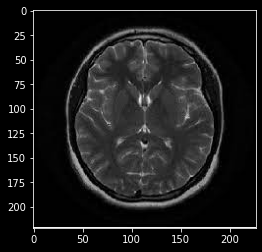

In [ ]:
# loading Model
modelx=tf.keras.models.load_model('/content/my_model3.hdf5') #passing model file

# taking image file and preprocessing
img = Image.open(r"/content/bt2.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)

#pridicting by passing img to model
res = modelx.predict_on_batch(x)

#showing pridiction as output
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confident that ' +names(classification))
print(res)

# GUI

In [ ]:
!pip install streamlit

In [ ]:
%%writefile myapp.py
import streamlit as st
import tensorflow as tf
import numpy as np

# def
def show_uploaded_img(uploaded_file):
  img = Image.open(uploaded_file)
  st.subheader("Uploaded file")
  st.image(img)
  return img

def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its NOT a tumor'

def make_prediction(img):
  x = np.array(img.resize((128,128)))
  x = x.reshape(1,128,128,3)
  res = modelx.predict_on_batch(x)
  classification = np.where(res == np.amax(res))[1][0]
  st.subheader("Results")
  st.text(str(res[0][classification]*100) + '% Confident that ' +names(classification))
  #st.text(res) 

st.title("Brain Tumour Classifier")

st.header("Classifier X-RAY IMAGES")

st.subheader("Upload a file Brain scanned file")

uploaded_file = st.file_uploader("", type=['png','jpg','jpeg'])

modelx=tf.keras.models.load_model('/content/my_model3.hdf5') #getting pretrained model

if uploaded_file is not None:
  img = show_uploaded_img(uploaded_file)
  if st.button("Classify"):
    make_predicition(img)
  else:
    st.write("Some error occured while Classifying the image!!!")
else:
  st.write("No image uploaded!!!")
  st.write("Upload an image to identify tumor.")

Overwriting myapp.py


In [ ]:
!streamlit run myapp.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.197.45.44:8501

2021-11-25 11:58:43.489265: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
exit
exit()
  Stopping...
  Stopping...
